In [22]:
from fastai.imports import *
from fastai import *
import pandas as pd
import numpy as np
from fastai import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [29]:
from fastai.imports import *

parse_dates — A list of any columns that contain dates
low_memory=False — Forces it to read more of the file to decide what the types are.

In [96]:
### To reduce the calculation presure,I select 10000 rows.
df_raw = pd.read_csv('Train.csv',low_memory=False, 
                     parse_dates=["saledate"])
df_raw = df_raw[200000:210000]
df_raw.shape

(10000, 53)

In [113]:
df_raw.tail().T

,209995,209996,209997,209998,209999
SalesID,1663142,1663143,1663144,1663145,1663146
SalePrice,9.56451,9.40096,9.6486,9.4727,10.0858
MachineID,1280405,1552442,1552442,1152306,1422132
ModelID,4991,4991,4991,4991,4991
datasource,132,132,132,132,132
auctioneerID,27,12,1,12,7
YearMade,1999,1999,1999,1999,1999
MachineHoursCurrentMeter,NaN,NaN,3284,NaN,NaN
UsageBand,NaN,NaN,Low,NaN,NaN
saledate,2006-04-21 00:00:00,2010-03-17 00:00:00,2011-02-15 00:00:00,2008-09-24 00:00:00,2007-03-07 00:00:00


In [114]:
df_raw.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,10000,NaN,NaN,NaN,NaN,NaN,1.64912e+06,8193.68,1.63867e+06,1.64193e+06,1.64555e+06,1.65744e+06,1.66315e+06
SalePrice,10000,NaN,NaN,NaN,NaN,NaN,9.95569,0.503407,8.4659,9.61581,9.9988,10.2751,11.6784
MachineID,10000,NaN,NaN,NaN,NaN,NaN,1.3049e+06,168560,791,1.18936e+06,1.31179e+06,1.43569e+06,1.55826e+06
ModelID,10000,NaN,NaN,NaN,NaN,NaN,6473.26,3743.04,1830,4605,4951,8016,26284
datasource,10000,NaN,NaN,NaN,NaN,NaN,132,0,132,132,132,132,132
auctioneerID,10000,NaN,NaN,NaN,NaN,NaN,7.1432,18.4163,1,1,1,4,99
YearMade,10000,NaN,NaN,NaN,NaN,NaN,1917.13,269.144,1000,1986,1998,2003,2008
MachineHoursCurrentMeter,933,NaN,NaN,NaN,NaN,NaN,3008.29,2263.13,2,1650,2493,3659,20959
UsageBand,933,3,Medium,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,10000,2070,2008-02-21 00:00:00,67,1989-01-17 00:00:00,2011-09-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [115]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

get the sale year istead of sale date

In [150]:
df_raw['saledate'] = pd.to_datetime(df_raw['saledate'])
df_raw['saleyear']= df_raw['saledate'].dt.year
df_raw.drop('saledate', axis=1, inplace=True)
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
200000,1638674,2.334615,1380754,4605,132,2.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2008
200001,1638675,2.300163,1472934,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2008
200002,1638676,2.311129,1214000,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2008
200003,1638677,2.329719,1147587,4789,132,1.0,1000,793,2,156,...,0,0,0,0,1,4,5,0,0,2011
200004,1638678,2.326298,1147587,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2005
200005,1638679,2.311129,1097411,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2010
200006,1638680,2.339254,1180674,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2007
200007,1638681,2.306901,1378282,4605,132,1.0,2001,-1,-1,37,...,0,0,0,0,0,0,0,0,0,2010
200008,1638682,2.311129,1083549,4607,132,10.0,2001,-1,-1,40,...,0,0,0,0,0,0,0,0,0,2010
200009,1638683,2.436676,1305729,4789,132,7.0,2001,-1,-1,156,...,0,0,0,0,1,4,5,0,0,2004


# Initial processing

change categaries into numeric values

In [120]:
# df_raw.head(50).T

In [151]:
list1 = ['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade','saleyear']

df_category = df_raw.drop(list1,axis = 1)
df_category.columns

Index(['MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [152]:
for i in df_category.columns:
    df_raw[i] = df_raw[i].astype('category').cat.codes

fix missing values, we just need to fix numeric values because Pandas handles them automatically by setting them to -1 

In [153]:
df_raw.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [154]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear
200000,1638674,2.334615,1380754,4605,132,2.0,2001,0,0,37,...,0,0,0,0,0,0,0,0,0,2008
200001,1638675,2.300163,1472934,4605,132,1.0,2001,0,0,37,...,0,0,0,0,0,0,0,0,0,2008
200002,1638676,2.311129,1214000,4605,132,1.0,2001,0,0,37,...,0,0,0,0,0,0,0,0,0,2008
200003,1638677,2.329719,1147587,4789,132,1.0,1000,794,3,156,...,0,0,0,0,1,4,5,0,0,2011
200004,1638678,2.326298,1147587,4605,132,1.0,2001,0,0,37,...,0,0,0,0,0,0,0,0,0,2005


In [166]:
y = df_raw.SalePrice
# x = df_raw.drop('SalePrice',axis =1)
x = df_raw.loc[:,df_raw.columns != 'SalePrice']

print(x.shape)
print(y.shape)

(10000, 52)
(10000,)


# create a random forest

In [164]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(x, y)
m.score(x,y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9652378827345705

Random forests are trivially parallelizable — meaning if you have more than one CPU, you can split up the data across different CPUs and it linearly scale. So the more CPUs you have, it will divide the time it takes by that number (not exactly but roughly). n_jobs=-1 tells the random forest regressor to create a separate job/process for each CPU you have.

In [165]:
### the score seems good, but may be it's overfitting,so we need a validation set.

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=66, test_size=0.2)

In [173]:
# train the model again

In [174]:
m.fit(x_train, y_train)
print(m.score(x_train,y_train))
print(m.score(x_val,y_val))

0.9657823255408019
0.8064430094945474


In [178]:
# m.predict(x_train)

array([2.33253131, 2.20672037, 2.22950724, ..., 2.29474365, 2.22745358,
       2.17610119])

In [175]:
### we also can use RMSE to evaluate the model

In [181]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse_train = rmse(m.predict(x_train), y_train)
rmse_val = rmse(m.predict(x_val),y_val)
print(rmse_train)
print(rmse_val)

0.009419043436117632
0.02193421450416569


In [182]:
# another way to calculate rmse

In [184]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(y_train, m.predict(x_train)))
rmse_val = sqrt(mean_squared_error(y_val, m.predict(x_val)))
print(rmse_train)
print(rmse_val)

0.009419043436117647
0.021934214504165675


# base model

In [221]:
### it's a good way to get a function to calculate all the values
def print_score(m):
    res = [rmse(m.predict(x_train), y_train), rmse(m.predict(x_val), y_val),
                m.score(x_train, y_train), m.score(x_val, y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [192]:
%time
print_score(m)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 22.9 µs
[0.009419043436117642, 0.021934214504165682, 0.9657823255408019, 0.8064430094945474]


In [193]:
#########

We are going to build a forest made of trees. Let’s start by looking at trees. In scikit-learn, they do not call them trees but estimators.

# single tree

In [194]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,
                          bootstrap=False, n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[0.034315468225645275, 0.03418134652042677, 0.545831772177712, 0.5299511197495581]


n_estimators=1 — create a forest with just one tree

max_depth=3 — to make it a small tree

bootstrap=False — random forest randomizes bunch of things, we want to turn that off by this parameter

Let's see what happens if we create a bigger tree, we remove max_depth###

In [196]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[1.2159893345056714e-05, 0.029410447433171935, 0.9999999429709125, 0.6520090484207475]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

# Bagging

Intro to bagging

To make these trees better, we will create a forest. To create a forest, we will use a statistical technique called bagging

So what is bagging? Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other. That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. So this idea of averaging models is a technique for Ensembling.

What if we created a whole a lot of trees — big, deep, massively overfit trees but each one, let’s say, we only pick a random 1/10 of the data. Let’s say we do that a hundred times (different random sample every time). They are overfitting terribly but since they are all using different random samples, they all overfit in different ways on different things. In other words, they all have errors but the errors are random. The average of a bunch of random errors is zero. If we take the average of these trees each of which have been trained on a different random subset, the error will average out to zero and what is left is the true relationship — and that’s the random forest.

Question: Are you saying we average 10 crappy models and we get a good model? [51:25] 
Exactly. Because the crappy models are based on different random subsets and their errors are not correlated with each other. If the errors were correlated, this will not work.

The key insight here is to construct multiple models which are better than nothing and where the errors are, as much as possible, not correlated with each other.

The entire purpose of modeling in machine learning is to find a model which tells you which variables are important and how do they interact together to drive your dependent variable.





################################
To learn about bagging in random forests, let's start with our basic model again.

In [201]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.009416920848114683, 0.022403322112884445, 0.9657977457567031, 0.7980752589347451]


We'll grab the predictions for each individual tree, and look at one example.

In [206]:
preds = np.stack([t.predict(x_val) for t in m.estimators_])
preds.shape

(10, 2000)

In [214]:
preds[0:3]

array([[2.39014609, 2.25620734, 2.32629769, ..., 2.29780144, 2.3111294 ,
        2.28219125],
       [2.2876942 , 2.28498369, 2.3151687 , ..., 2.30581192, 2.3151687 ,
        2.27634056],
       [2.38587499, 2.25620734, 2.32971873, ..., 2.33461482, 2.3151687 ,
        2.2876942 ]])

In [208]:
np.mean(preds[:,0])

2.3478264167255936

In [212]:
y_val.shape

(2000,)

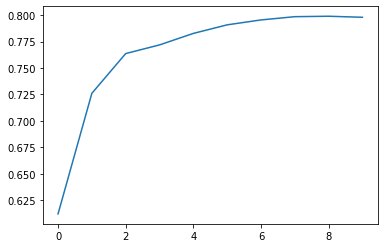

In [216]:
plt.plot([metrics.r2_score(y_val, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

##################
The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)



In [217]:
###let's try 
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[0.00869922214278041, 0.02141877727775127, 0.9708124438715491, 0.8154330064182823]


In [218]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[0.008228752161192331, 0.021667965910844342, 0.97388410852647, 0.8111134755264301]


In [219]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(x_train, y_train)
print_score(m)

[0.00805285539390309, 0.021338951363198595, 0.9749886754428073, 0.8168061729756853]


# Out-of-bag (OOB) score

Sometimes your dataset will be small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

In [222]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(x_train, y_train)
print_score(m)

[0.008106672505721092, 0.02116376346784306, 0.9746532577660387, 0.8198017842380154, 0.8176479683963969]


OOB score will come in handy when setting hyper parameters [1:13:47]. There will be quite a few hyper parameters that we are going to set and we would like to find some automated say to set them. One way to do that is to do grid search. Scikit-learn has a function called grid search and you pass in a list of all the hyper parameters you want to tune and all of the values of these hyper parameters you want to try. It will run your model on every possible combination of all these hyper parameters and tell you which one is the best. OOB score is a great choice for getting it to tell you which one is the best.

NameError: name 'set_rf_samples' is not defined